In [1]:
!pip install SpeechRecognition



Defaulting to user installation because normal site-packages is not writeable


In [2]:
import speech_recognition as sr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import soundfile as sf
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [41]:
audio = r"E:\Learn-.wav"
file = sf.SoundFile(audio) 
video_length = int(len(file) / file.samplerate) + (len(file)%file.samplerate > 0)  
print(video_length)

loop_number = int(video_length/10) + (video_length% 10 >0) 
print(loop_number)


808
81


In [42]:

def transcribe(loops, starting_increment):
    audio_text = [] 
    increment = starting_increment 
    for i in range(loops):
        r = sr.Recognizer()
        with sr.AudioFile(file) as source:
            audio = r.record(source, offset = (increment) , duration= 10)
        string = r.recognize_google(audio)
        audio_text.append(string)
        increment += 10
    return audio_text

In [43]:
audio_text = transcribe(loop_number, 0)

In [44]:
text = " ".join(audio_text)
print(text)

welcome to my English study channel can you learn new words to enhance your vocabulary and speaking skills see the word hear the word say the word practice often to remember all words better the more you practice the better you will become welcome English lesson and feelings and emotions today we will learn 30 new words to describe how we feel and understand others better even if your English will make it super easy with lots of examples and fun exercises let's get started and learn some awesome new words feelings and emotions part 1 happy happy you happy when I spend time with my happy ecstatic ecstatic I feel like static when I am extremely happy ecstatic amazed amazed I feel amazed when I see something really impressive excited excited I feel excited when I am looking forward to something excited surprised Sur I feel surprised when something unexpected happens surprised Sharks Sharks I feel shocked something bad happens suddenly shocked sad I feel sad when something makes me unhappy

In [52]:
import string
from collections import Counter
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenised_words = cleaned_text.split()
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

final_words = []
for word in tokenised_words:
    if word not in stop_words:
        final_words.append(word)

print(final_words)


['welcome', 'english', 'study', 'channel', 'learn', 'new', 'words', 'enhance', 'vocabulary', 'speaking', 'skills', 'see', 'word', 'hear', 'word', 'say', 'word', 'practice', 'often', 'remember', 'words', 'better', 'practice', 'better', 'become', 'welcome', 'english', 'lesson', 'feelings', 'emotions', 'today', 'learn', '30', 'new', 'words', 'describe', 'feel', 'understand', 'others', 'better', 'even', 'english', 'make', 'super', 'easy', 'lots', 'examples', 'fun', 'exercises', 'lets', 'get', 'started', 'learn', 'awesome', 'new', 'words', 'feelings', 'emotions', 'part', '1', 'happy', 'happy', 'happy', 'spend', 'time', 'happy', 'ecstatic', 'ecstatic', 'feel', 'like', 'static', 'extremely', 'happy', 'ecstatic', 'amazed', 'amazed', 'feel', 'amazed', 'see', 'something', 'really', 'impressive', 'excited', 'excited', 'feel', 'excited', 'looking', 'forward', 'something', 'excited', 'surprised', 'sur', 'feel', 'surprised', 'something', 'unexpected', 'happens', 'surprised', 'sharks', 'sharks', 'fee

In [54]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)

Positive Sentiment


{'neg': 0.283, 'neu': 0.418, 'pos': 0.299, 'compound': 0.9728}


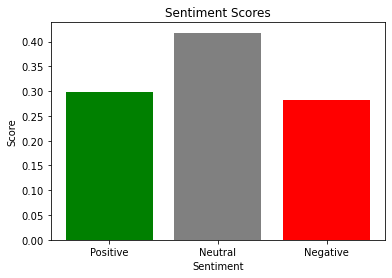

In [66]:
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
print(sid.polarity_scores(cleaned_text))

sentiment_scores = sid.polarity_scores(cleaned_text)
pos_score = sentiment_scores['pos']
neu_score = sentiment_scores['neu']
neg_score = sentiment_scores['neg']
categories = ['Positive', 'Neutral', 'Negative']
scores = [pos_score, neu_score, neg_score]

plt.bar(categories, scores, color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Sentiment Scores')
plt.show()

In [63]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
sent_tokenizer = PunktSentenceTokenizer(text)
sents = sent_tokenizer.tokenize(text)
 
print(word_tokenize(text))
print(sent_tokenize(text))


['welcome', 'to', 'my', 'English', 'study', 'channel', 'can', 'you', 'learn', 'new', 'words', 'to', 'enhance', 'your', 'vocabulary', 'and', 'speaking', 'skills', 'see', 'the', 'word', 'hear', 'the', 'word', 'say', 'the', 'word', 'practice', 'often', 'to', 'remember', 'all', 'words', 'better', 'the', 'more', 'you', 'practice', 'the', 'better', 'you', 'will', 'become', 'welcome', 'English', 'lesson', 'and', 'feelings', 'and', 'emotions', 'today', 'we', 'will', 'learn', '30', 'new', 'words', 'to', 'describe', 'how', 'we', 'feel', 'and', 'understand', 'others', 'better', 'even', 'if', 'your', 'English', 'will', 'make', 'it', 'super', 'easy', 'with', 'lots', 'of', 'examples', 'and', 'fun', 'exercises', 'let', "'s", 'get', 'started', 'and', 'learn', 'some', 'awesome', 'new', 'words', 'feelings', 'and', 'emotions', 'part', '1', 'happy', 'happy', 'you', 'happy', 'when', 'I', 'spend', 'time', 'with', 'my', 'happy', 'ecstatic', 'ecstatic', 'I', 'feel', 'like', 'static', 'when', 'I', 'am', 'extre